In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import py3Dmol
import glob
sns.set_style('darkgrid')
%cd /net/pulsar/home/koes/jok120/openfold
%matplotlib inline

/net/pulsar/home/koes/jok120/openfold


In [2]:
# Run information
# name: predict-train-01
# training without optimizer steps on sidechainnet minimized structures (scnmin)
# run id: 2y2rizcz
# wandb url: https://wandb.ai/jonathanking/finetune-openfold-01/runs/2y2rizcz
# wandb run dir: out/experiments/230214/wandb/run-20230221_121116-2y2rizcz/files
# slurm id: 18086775
# slurm output: out/18086775_4294967294.out
# output log csv: out/experiments/230214/wandb/run-20230221_121116-2y2rizcz/files/train.csv

In [2]:
# Load csv in pandas
train_csv = "out/experiments/230214/wandb/run-20230221_121116-2y2rizcz/files/train.csv"
df = pd.read_csv(train_csv)
df.sort_values(by='gdcall_aa', ascending=False).head()

protein_name  distogram  experimentally_resolved      fape  plddt_loss  \
33729       3tyj_A   0.861885                      0.0  0.185397         0.0   
38368       3m7u_A   0.778834                      0.0  0.194896         0.0   
13054       3urc_A   0.727618                      0.0  0.177375         0.0   
31103       2p3j_A   0.800174                      0.0  0.206340         0.0   
31177       2xtq_A   0.541779                      0.0  0.260933         0.0   

       masked_msa  supervised_chi  violation  openmm_scaled  openmm  ...  \
33729    1.044518        0.078683   0.037440            0.0     0.0  ...   
38368    0.736835        0.118385   0.008503            0.0     0.0  ...   
13054    0.706003        0.087906   0.006172            0.0     0.0  ...   
31103    0.164475        0.104493   0.011698            0.0     0.0  ...   
31177    0.394470        0.087022   0.005370            0.0     0.0  ...   

        rmsd_ca  gdtts_ca  gdtha_ca   rmsd_aa  gdcall_aa  tmscore_aa  \
33729  0.338112  0.998162  0.981618  0.945300   0.935483    0.994978   
38368  0.363464  0.998737  0.972222  0.886444   0.932366    0.996111   
13054  0.345217  1.000000  0.969697  0.882722   0.925950    0.996192   
31103  0.423213  0.995342  0.947205  0.948125   0.918039    0.995303   
31177  0.382934  0.999023  0.956055  0.758180   0.918033    0.997074   

       tmscore_ca  drmsd_aa   lddt_aa  lddtquasi_aa  
33729    0.994061  0.838823  0.951410      0.951584  
38368    0.995245  0.729618  0.944000      0.944167  
13054    0.995700  0.748327  0.939482      0.939664  
31103    0.992174  0.780984  0.941019      0.941202  
31177    0.995842  0.619119  0.941905      0.942090  

[5 rows x 24 columns]

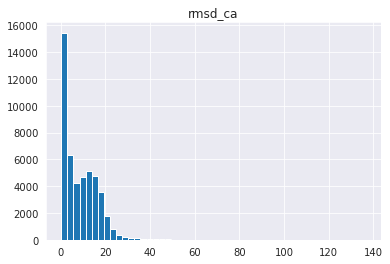

In [13]:
df.hist(column="rmsd_ca", bins=50);

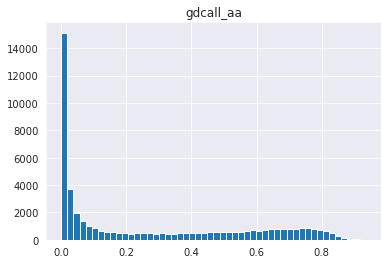

In [12]:
df.hist(column="gdcall_aa", bins=50);

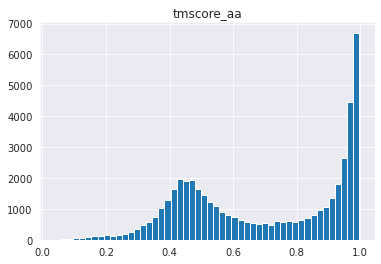

In [5]:
df.hist(column="tmscore_aa", bins=50);

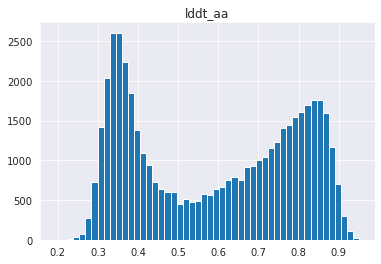

In [6]:
df.hist(column="lddt_aa", bins=50);

In [4]:
# Sort the dataframe by the gdcall_aa column
df_sorted = df.sort_values(by="rmsd_ca", ascending=False)

# Plot the sorted dataframe
df_sorted.head()

protein_name  distogram  experimentally_resolved      fape  plddt_loss  \
17899       4p99_A   0.947344                      0.0  0.931567         0.0   
55          3p4g_A   2.057047                      0.0  0.962259         0.0   
29275       3jan_L   0.558024                      0.0  7.417125         0.0   
9999        3j7q_L   0.566412                      0.0  0.965434         0.0   
13295       3fby_A   0.962439                      0.0  0.968008         0.0   

       masked_msa  supervised_chi  violation  openmm_scaled  openmm  ...  \
17899    0.666975        0.397573   0.473193            0.0     0.0  ...   
55       0.901777        0.297149   0.138165            0.0     0.0  ...   
29275    0.000038        0.527236   1.042969            0.0     0.0  ...   
9999     0.000026        0.517714   0.886900            0.0     0.0  ...   
13295    0.467912        0.398190   0.443538            0.0     0.0  ...   

          rmsd_ca  gdtts_ca  gdtha_ca     rmsd_aa  gdcall_aa  tmscore_aa  \
17899  136.550980  0.000000   0.00000  135.957077   0.000000    0.051670   
55     132.001099  0.001953   0.00000  132.662857   0.000430    0.050610   
29275  116.998734  0.003571   0.00000  117.803223   0.001260    0.075011   
9999   115.480324  0.009524   0.00119  116.138176   0.001730    0.087601   
13295  107.547417  0.003906   0.00000  107.317223   0.000066    0.080763   

       tmscore_ca    drmsd_aa   lddt_aa  lddtquasi_aa  
17899    0.014317  187.435211  0.672179      0.675341  
55       0.015199  184.602341  0.633500      0.637763  
29275    0.022204  148.459717  0.487635      0.492591  
9999     0.031905  148.625031  0.497060      0.501943  
13295    0.025693  142.888794  0.483789      0.488237  

[5 rows x 24 columns]

In [11]:
df_sorted[df_sorted['rmsd_ca'] > 10].sort_values(by="rmsd_ca", ascending=True)

protein_name  distogram  experimentally_resolved      fape  plddt_loss  \
19400        2rqw_A   2.534200                      0.0  0.697883         0.0   
16050  1n26_d1n26a3   3.013816                      0.0  0.896581         0.0   
34554  2ivd_d2ivdb2   3.096410                      0.0  0.882875         0.0   
1090   2x52_d2x52a1   3.442545                      0.0  0.868622         0.0   
42228        4e5p_A   1.997000                      0.0  0.817849         0.0   
...             ...        ...                      ...       ...         ...   
13295        3fby_A   0.962439                      0.0  0.968008         0.0   
9999         3j7q_L   0.566412                      0.0  0.965434         0.0   
29275        3jan_L   0.558024                      0.0  7.417125         0.0   
55           3p4g_A   2.057047                      0.0  0.962259         0.0   
17899        4p99_A   0.947344                      0.0  0.931567         0.0   

       masked_msa  supervised_chi  violation  openmm_scaled  openmm  ...  \
19400    0.692505        0.676481   0.267682            0.0     0.0  ...   
16050    0.000081        0.497240   1.014751            0.0     0.0  ...   
34554    0.000007        0.420131   1.158851            0.0     0.0  ...   
1090     0.000023        0.616457   2.561887            0.0     0.0  ...   
42228    0.747479        0.256607   0.029535            0.0     0.0  ...   
...           ...             ...        ...            ...     ...  ...   
13295    0.467912        0.398190   0.443538            0.0     0.0  ...   
9999     0.000026        0.517714   0.886900            0.0     0.0  ...   
29275    0.000038        0.527236   1.042969            0.0     0.0  ...   
55       0.901777        0.297149   0.138165            0.0     0.0  ...   
17899    0.666975        0.397573   0.473193            0.0     0.0  ...   

          rmsd_ca  gdtts_ca  gdtha_ca     rmsd_aa  gdcall_aa  tmscore_aa  \
19400   10.000155  0.266667  0.085714   10.033915   0.100451    0.698733   
16050   10.000881  0.134615  0.038462   10.881554   0.029777    0.541935   
34554   10.001818  0.180556  0.050926   10.490618   0.039826    0.585817   
1090    10.001937  0.122549  0.004902   10.937478   0.005378    0.376676   
42228   10.001941  0.141602  0.021484   10.281537   0.013788    0.690999   
...           ...       ...       ...         ...        ...         ...   
13295  107.547417  0.003906  0.000000  107.317223   0.000066    0.080763   
9999   115.480324  0.009524  0.001190  116.138176   0.001730    0.087601   
29275  116.998734  0.003571  0.000000  117.803223   0.001260    0.075011   
55     132.001099  0.001953  0.000000  132.662857   0.000430    0.050610   
17899  136.550980  0.000000  0.000000  135.957077   0.000000    0.051670   

       tmscore_ca    drmsd_aa   lddt_aa  lddtquasi_aa  
19400    0.346021    5.667214  0.621120      0.622677  
16050    0.213438    7.671887  0.332344      0.334783  
34554    0.267153    7.093073  0.362480      0.364978  
1090     0.079758    7.675190  0.358254      0.361852  
42228    0.364205    7.793716  0.722168      0.723528  
...           ...         ...       ...           ...  
13295    0.025693  142.888794  0.483789      0.488237  
9999     0.031905  148.625031  0.497060      0.501943  
29275    0.022204  148.459717  0.487635      0.492591  
55       0.015199  184.602341  0.633500      0.637763  
17899    0.014317  187.435211  0.672179      0.675341  

[19366 rows x 24 columns]

In [17]:
!ls /net/pulsar/home/koes/jok120/scnmin221013/min/4U6F*_M5*

^C


In [ ]:
!ls /net/pulsar/home/koes/jok120/scnmin221013/min/3TYJ*A*

/net/pulsar/home/koes/jok120/scnmin221013/min/3TYJ_1_A.pdb
/net/pulsar/home/koes/jok120/scnmin221013/min/3TYJ_1_A.pkl
/net/pulsar/home/koes/jok120/scnmin221013/min/3TYJ_1_A.png


In [8]:
PRED_DIR = "out/experiments/230214/wandb/run-20230221_121116-2y2rizcz/files/pdbs/pred"
TRUE_DIR = "out/experiments/230214/wandb/run-20230221_121116-2y2rizcz/files/pdbs/true"

def get_pred_true_filenames(protein_name):
    pred_filename_pattern = f"{PRED_DIR}/pred_*_{protein_name}.pdb"
    true_filename_pattern = f"{TRUE_DIR}/true_*_{protein_name}.pdb"
    # Get the filename by pattern matching with glob
    pred_filename = glob.glob(pred_filename_pattern)[0]
    true_filename = glob.glob(true_filename_pattern)[0]

    prefix = "./"
    
    return prefix + pred_filename, prefix + true_filename

# get_pred_true_filenames("4u6f_M5")

In [9]:
def get_protein_names(df, n=5, start=0):
    for i in range(start, start + n):
        yield df.iloc[i]["protein_name"]

In [10]:
N = 3
START = 1
view = py3Dmol.view(width=1200, height=1400, viewergrid=(N, 3))

for i, protein_name in enumerate(get_protein_names(df_sorted, n=N, start=START)):
    query, chain = protein_name.split("_")
    print(query, chain)

    pdb_filenames = get_pred_true_filenames(protein_name)
    with open(pdb_filenames[0], "r") as f:
        pred_str = f.read()
    with open(pdb_filenames[1], "r") as f:
        true_str = f.read() 

    view.addModel(pred_str, "pdb", viewer=(i, 0))
    view.addModel(true_str, "pdb", viewer=(i, 1))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 0))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 1))
    
    # How to add true RCSB structure via chain?
    rcsb_url = f"https://files.rcsb.org/download/{query}.cif"
    print(rcsb_url)
    # download file from url and store as string using requests
    import requests
    rcsb_str = requests.get(rcsb_url).text
    # print(rcsb_str)

    view.addModel(rcsb_str, "cif", viewer=(i, 2))
    # view.addModel(query="pdb:"+query, viewer=(i, 2))
    view.setStyle({'cartoon':{'color':'spectrum'}}, viewer=(i, 2))
    if len(chain) <= 3:
        view.setStyle({}, {}, viewer=(i, 2))
        view.setStyle({'chain': chain.upper()}, {'cartoon': {'color': 'spectrum'}}, viewer=(i, 2))

view.zoomTo()
view.show()



1qqb d1qqba1
https://files.rcsb.org/download/1qqb.cif
3txa A
https://files.rcsb.org/download/3txa.cif
3vlm d3vlmb2
https://files.rcsb.org/download/3vlm.cif


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol